In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def load_house_data():
    data = np.loadtxt("../data/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [12]:
# load the dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [13]:
df = pd.DataFrame(
    np.column_stack((X_train, y_train)), 
    columns=X_features + ['price']
)

df.head()

,size(sqft),bedrooms,floors,age,price
0,1244.0,3.0,1.0,64.0,300.0
1,1947.0,3.0,2.0,17.0,509.8
2,1725.0,3.0,2.0,42.0,394.0
3,1959.0,3.0,2.0,15.0,540.0
4,1314.0,2.0,1.0,14.0,415.0


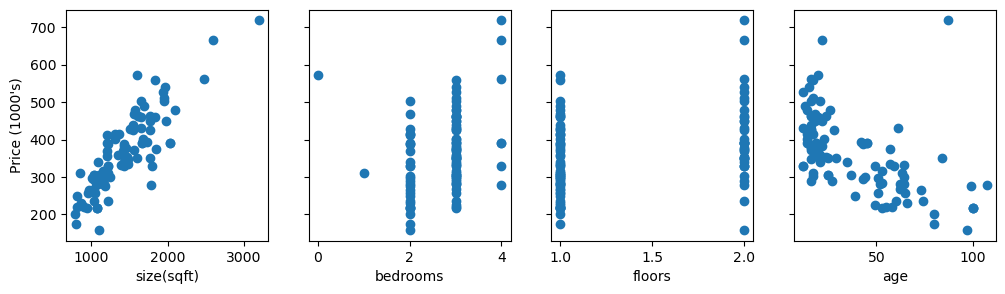

In [14]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [15]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [16]:
zscore_normalize_features(X_train)

(array([[-4.23632450e-01,  4.33808841e-01, -7.89272336e-01,
          9.93726440e-01],
        [ 1.28427160e+00,  4.33808841e-01,  1.26698980e+00,
         -8.29542143e-01],
        [ 7.44933479e-01,  4.33808841e-01,  1.26698980e+00,
          1.40281572e-01],
        [ 1.31342501e+00,  4.33808841e-01,  1.26698980e+00,
         -9.07128040e-01],
        [-2.53570880e-01, -1.10001528e+00, -7.89272336e-01,
         -9.45920989e-01],
        [-1.34682383e+00, -1.10001528e+00, -7.89272336e-01,
          1.07131234e+00],
        [ 1.01460254e+00,  4.33808841e-01, -7.89272336e-01,
         -8.29542143e-01],
        [-9.53252767e-01,  4.33808841e-01, -7.89272336e-01,
          1.79074520e-01],
        [ 4.31379699e+00,  1.96763296e+00,  1.26698980e+00,
          1.88596426e+00],
        [-1.53146210e+00, -1.10001528e+00, -7.89272336e-01,
          1.61441362e+00],
        [-5.30528294e-01, -1.10001528e+00,  1.26698980e+00,
         -8.29542143e-01],
        [ 3.36785712e-01, -1.10001528e+00, 

In [17]:
from sklearn.preprocessing import scale
scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)

array([[-4.23632450e-01,  4.33808841e-01, -7.89272336e-01,
         9.93726440e-01],
       [ 1.28427160e+00,  4.33808841e-01,  1.26698980e+00,
        -8.29542143e-01],
       [ 7.44933479e-01,  4.33808841e-01,  1.26698980e+00,
         1.40281572e-01],
       [ 1.31342501e+00,  4.33808841e-01,  1.26698980e+00,
        -9.07128040e-01],
       [-2.53570880e-01, -1.10001528e+00, -7.89272336e-01,
        -9.45920989e-01],
       [-1.34682383e+00, -1.10001528e+00, -7.89272336e-01,
         1.07131234e+00],
       [ 1.01460254e+00,  4.33808841e-01, -7.89272336e-01,
        -8.29542143e-01],
       [-9.53252767e-01,  4.33808841e-01, -7.89272336e-01,
         1.79074520e-01],
       [ 4.31379699e+00,  1.96763296e+00,  1.26698980e+00,
         1.88596426e+00],
       [-1.53146210e+00, -1.10001528e+00, -7.89272336e-01,
         1.61441362e+00],
       [-5.30528294e-01, -1.10001528e+00,  1.26698980e+00,
        -8.29542143e-01],
       [ 3.36785712e-01, -1.10001528e+00, -7.89272336e-01,
      

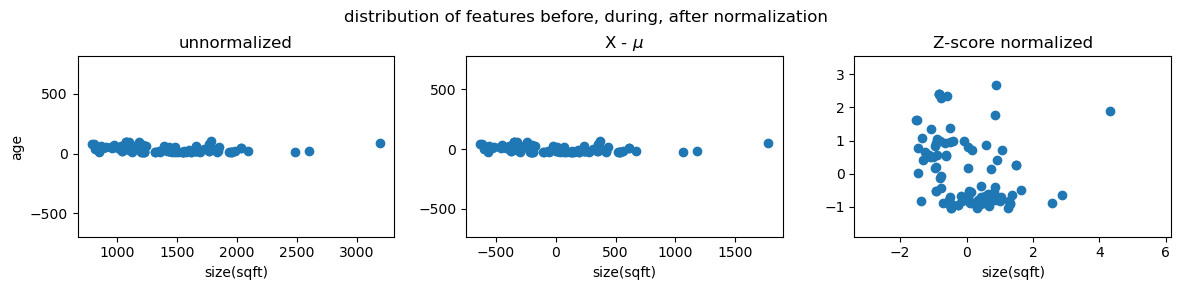

In [18]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [19]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]
